# Designing solution for Anomaly Detection

<b>Import required libraries<b/>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<b>Load Data<b/>

In [3]:
df = pd.read_csv('AnomalyData.csv')

In [4]:
df.columns

Index(['State', 'state_code', 'data science', 'cluster analysis', 'college',
       'startup', 'entrepreneur', 'ceo', 'mortgage', 'nba', 'nfl', 'mlb',
       'fifa', 'modern dance', 'prius', 'escalade', 'subaru', 'jello', 'bbq',
       'royal family', 'obfuscation', 'unicorn', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'PsychRegions', 'region', 'division'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 30 columns):
State                48 non-null object
state_code           48 non-null object
data science         48 non-null float64
cluster analysis     48 non-null float64
college              48 non-null float64
startup              48 non-null float64
entrepreneur         48 non-null float64
ceo                  48 non-null float64
mortgage             48 non-null float64
nba                  48 non-null float64
nfl                  48 non-null float64
mlb                  48 non-null float64
fifa                 48 non-null float64
modern dance         48 non-null float64
prius                48 non-null float64
escalade             48 non-null float64
subaru               48 non-null float64
jello                48 non-null float64
bbq                  48 non-null float64
royal family         48 non-null float64
obfuscation          48 non-null float64
unicorn              48 non-null float

<b>Display all columns in the pandas dataset<b/>

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,State,state_code,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,nfl,mlb,fifa,modern dance,prius,escalade,subaru,jello,bbq,royal family,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
0,Alabama,AL,-1.00,-0.13,1.10,-0.68,0.15,-0.73,1.53,-0.74,-1.83,-1.30,-0.80,-1.22,-0.74,0.10,-1.19,-0.75,1.52,0.26,-0.32,-1.03,55.5,52.7,55.5,48.7,42.7,1,3,6
1,Arizona,AZ,-0.42,-0.73,-0.10,0.11,0.57,0.25,0.95,0.38,0.68,0.14,0.10,0.30,1.19,0.78,-0.70,-0.58,0.36,-1.06,0.38,0.10,50.6,46.6,58.4,38.1,54.7,2,4,8
2,Arkansas,AR,-0.66,-0.39,-0.64,-0.08,0.01,-0.66,-0.50,-0.71,-1.59,-1.24,-0.88,-1.36,-0.43,0.93,-0.79,-0.19,1.01,-0.09,-0.45,-0.32,49.9,52.7,41.0,56.2,40.3,1,3,7
3,California,CA,1.95,-0.62,-0.26,2.02,0.46,1.27,-0.97,1.46,-0.91,0.39,1.94,0.33,3.97,-0.28,-0.52,-1.21,1.37,-1.04,0.70,-0.38,51.4,49.0,43.2,39.1,65.0,2,4,9
4,Colorado,CO,0.34,0.00,-0.61,1.49,0.05,0.33,1.38,-0.80,1.17,-0.51,-0.33,-0.34,0.24,0.01,1.37,-0.55,0.63,-0.80,1.32,0.20,45.3,47.5,58.8,34.3,57.9,1,4,8


In [9]:
df.describe()

,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,nfl,mlb,fifa,modern dance,prius,escalade,subaru,jello,bbq,royal family,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,-0.000833,-0.012500,0.060625,0.013542,0.031667,-0.030000,-0.026250,-0.025000,-0.027292,0.021458,0.038333,-0.007708,-0.048958,0.018958,-0.020417,0.002917,0.001667,-0.113750,-0.003542,0.015000,49.695833,50.593750,50.1250,50.185417,49.427083,1.791667,2.604167,4.958333
std,0.971397,0.972073,0.982906,1.023726,0.974069,0.910588,0.984956,0.998769,1.017104,1.010104,1.001002,1.024544,0.958153,1.026055,0.991573,1.010277,1.015286,0.904096,1.010908,0.991743,9.862975,9.192166,10.0659,10.030952,9.267117,0.874176,1.046566,2.483634
min,-1.270000,-1.700000,-1.960000,-1.830000,-1.940000,-1.380000,-2.400000,-1.720000,-2.560000,-1.500000,-1.570000,-1.360000,-1.390000,-2.340000,-1.340000,-1.620000,-1.680000,-2.550000,-1.770000,-1.720000,26.500000,29.800000,24.0000,30.400000,21.800000,1.000000,1.000000,1.000000
25%,-0.662500,-0.730000,-0.617500,-0.650000,-0.607500,-0.675000,-0.732500,-0.855000,-0.650000,-0.812500,-0.672500,-0.630000,-0.582500,-0.602500,-0.740000,-0.757500,-0.905000,-0.645000,-0.730000,-0.537500,44.350000,45.775000,43.0500,43.850000,42.700000,1.000000,2.000000,3.000000
50%,-0.235000,-0.135000,-0.050000,-0.055000,0.070000,-0.115000,-0.005000,-0.130000,-0.140000,-0.035000,-0.250000,-0.215000,-0.290000,-0.130000,-0.280000,-0.195000,-0.185000,-0.255000,-0.105000,-0.165000,51.150000,52.050000,51.3500,49.000000,49.850000,1.500000,3.000000,5.000000
75%,0.352500,0.412500,0.747500,0.332500,0.485000,0.420000,0.537500,0.612500,0.702500,0.867500,0.760000,0.485000,0.172500,0.682500,0.460000,0.572500,0.817500,0.440000,0.462500,0.387500,56.050000,56.625000,56.1250,56.925000,56.675000,3.000000,3.000000,7.000000
max,2.730000,2.910000,2.360000,2.630000,2.740000,2.460000,1.890000,2.120000,2.090000,2.490000,2.600000,4.790000,3.970000,2.000000,3.210000,2.650000,2.050000,1.750000,2.590000,3.220000,69.800000,69.400000,69.6000,79.200000,65.000000,3.000000,4.000000,9.000000


In [10]:
df.corr()

,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,nfl,mlb,fifa,modern dance,prius,escalade,subaru,jello,bbq,royal family,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
data science,1.000000,0.515322,0.234620,0.571125,0.244883,0.827573,0.232255,0.339015,-0.010459,0.456911,0.664236,0.413652,0.472205,-0.391230,0.109452,-0.348133,-0.149987,0.367900,0.573107,-0.006891,-0.150531,-0.330719,-0.385545,0.026570,0.526476,0.525460,-0.241637,-0.237509
cluster analysis,0.515322,1.000000,0.306682,0.417653,0.338971,0.423187,0.422482,-0.027146,0.278204,0.267177,0.126510,0.370242,0.069603,-0.350360,0.235362,0.039839,-0.421174,0.521753,0.533919,0.066124,-0.142460,-0.188341,-0.292934,0.158632,0.043046,0.355168,-0.227701,-0.305056
college,0.234620,0.306682,1.000000,0.034665,0.023155,0.265010,0.084482,-0.102293,-0.084217,0.306460,0.057498,0.043303,0.075744,-0.187946,0.152443,-0.017704,-0.095490,0.652759,0.118185,-0.037327,0.066038,-0.082737,-0.200468,0.341316,-0.038550,0.286159,-0.572893,-0.570083
startup,0.571125,0.417653,0.034665,1.000000,0.144738,0.479108,0.408186,-0.033708,0.123187,0.232927,0.105295,0.496930,0.607550,-0.424670,0.573378,0.101297,-0.195506,0.276730,0.802191,0.622563,-0.313433,-0.107036,-0.353204,-0.140783,0.212303,0.374109,-0.010380,-0.001698
entrepreneur,0.244883,0.338971,0.023155,0.144738,1.000000,0.466465,0.534047,0.489639,0.084266,0.020219,0.214568,0.255552,-0.094345,0.243247,-0.392856,-0.118478,0.268836,-0.032940,0.042877,-0.250256,0.431629,0.024527,0.263212,-0.200065,0.097779,0.010911,0.049708,-0.010349
ceo,0.827573,0.423187,0.265010,0.479108,0.466465,1.000000,0.383807,0.543882,-0.018916,0.586652,0.638202,0.340654,0.351721,-0.216864,0.021788,-0.400209,-0.039982,0.342438,0.408758,-0.116152,0.097022,-0.395411,-0.289016,0.077181,0.499034,0.485397,-0.364362,-0.371236
mortgage,0.232255,0.422482,0.084482,0.408186,0.534047,0.383807,1.000000,0.073800,0.213263,0.069867,0.002059,0.386186,0.140359,-0.039584,0.071206,-0.156475,0.012936,0.312534,0.459819,0.144367,0.060950,-0.116628,0.034910,-0.125185,0.171571,0.143261,0.015506,-0.052207
nba,0.339015,-0.027146,-0.102293,-0.033708,0.489639,0.543882,0.073800,1.000000,-0.144586,0.132482,0.425987,0.292807,0.054430,0.377373,-0.467998,-0.372657,0.291932,-0.231412,-0.125710,-0.383776,0.277663,-0.150662,0.081426,-0.040003,0.378079,0.106005,-0.007837,0.019042
nfl,-0.010459,0.278204,-0.084217,0.123187,0.084266,-0.018916,0.213263,-0.144586,1.000000,0.177854,-0.246795,-0.080503,-0.088942,0.213602,0.146131,0.319502,-0.307156,0.054966,0.031705,0.116715,0.063595,-0.254451,0.029693,-0.070196,-0.157047,-0.006292,0.018018,-0.024970
mlb,0.456911,0.267177,0.306460,0.232927,0.020219,0.586652,0.069867,0.132482,0.177854,1.000000,0.422150,0.022926,0.258265,-0.328093,0.195109,-0.008761,-0.304582,0.394118,0.196068,0.063748,0.124701,-0.434812,-0.376922,0.321245,0.144751,0.431421,-0.685355,-0.684988


<b>Do Exploratory Data Analysis:<b/>

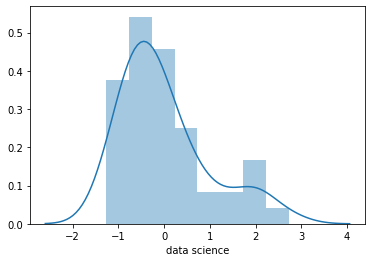

In [17]:
sns.distplot(df['data science'])

<b>Univariate outliers<b/>

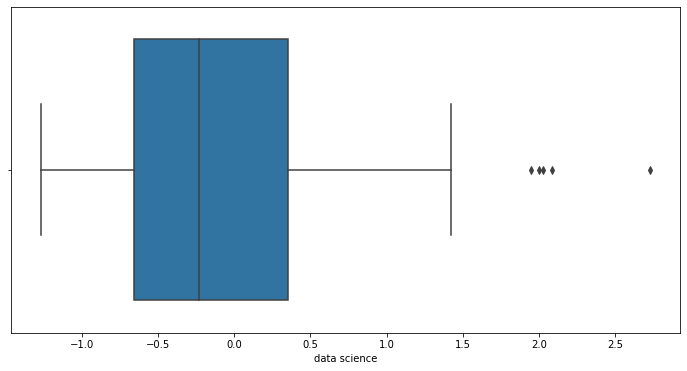

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(df['data science'])


<b>As seen from above we can easily identify univariate outliers for data science based on the above plot<b/>

In [25]:
df.columns

Index(['State', 'state_code', 'data science', 'cluster analysis', 'college',
       'startup', 'entrepreneur', 'ceo', 'mortgage', 'nba', 'nfl', 'mlb',
       'fifa', 'modern dance', 'prius', 'escalade', 'subaru', 'jello', 'bbq',
       'royal family', 'obfuscation', 'unicorn', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'PsychRegions', 'region', 'division'],
      dtype='object')

<b>Creating custom boxplot for Outliers based on Quantile value & IQR:<b/>

In [26]:
variable = 'data science'

<b>Using state code to label the outliers and then removing it to keep only the outlier variables<b/>

In [29]:
state_code = df['state_code']
data = df.loc[:, 'data science': 'Openness']

In [31]:
data.columns

Index(['data science', 'cluster analysis', 'college', 'startup',
       'entrepreneur', 'ceo', 'mortgage', 'nba', 'nfl', 'mlb', 'fifa',
       'modern dance', 'prius', 'escalade', 'subaru', 'jello', 'bbq',
       'royal family', 'obfuscation', 'unicorn', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'],
      dtype='object')

<b>Getting Quantile values and Inter Quantile Range<b/>

In [32]:
QV1 = data[variable].quantile(0.25)
QV2 = data[variable].quantile(0.50)
QV3 = data[variable].quantile(0.75)

qv_limit = 1.5 * (QV3-QV1)

In [33]:
qv_limit

1.5225

In [35]:
outlier_range = (data[variable]> QV3 +qv_limit) | (data[variable]<QV1-qv_limit)
outlier_data = data[variable][outlier_range]
outlier_name = state_code[outlier_range]

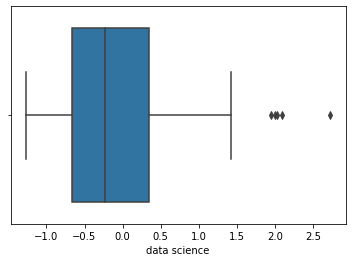

In [37]:
sns.boxplot(data[variable])

<b>Plotting the data with states<b>

In [39]:
import pylab

Text(0, 0.5, 'data science')

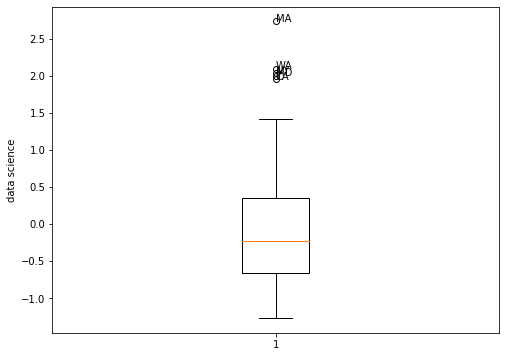

In [44]:
fig = pylab.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
for name, y in zip(outlier_name, outlier_data):
    ax.text(1, y, name)
ax.boxplot(data[variable])
ax.set_ylabel(variable)

<b>Multivariate Outlier detection using One Class Support Vector algorithm:<b>

In [45]:
from sklearn.svm import OneClassSVM

In [46]:
ocsvm = OneClassSVM(nu=0.25, gamma=0.05)

<b>List the names of outlier states based on One Class SVM algorithm<b>

In [49]:
ocsvm.fit(data)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.05, kernel='rbf',
            max_iter=-1, nu=0.25, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

In [50]:
state_code[ocsvm.predict(data) ==-1]

7     FL
13    KS
14    KY
16    ME
17    MD
18    MA
19    MI
20    MN
21    MS
24    NE
25    NV
27    NJ
28    NM
30    NC
33    OK
39    TN
43    VA
Name: state_code, dtype: object